## Multiple Linear Regression in Python

In [1]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt


#### Basic Tutorial from https://datatofish.com/multiple-linear-regression-python/

In [2]:
# create dataframe

df = pd.read_csv("CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


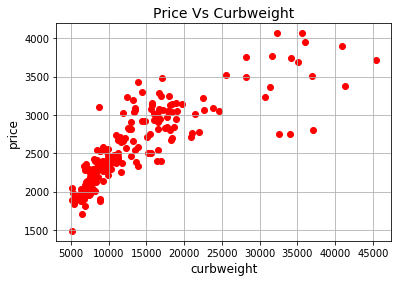

In [4]:
# Check Linearity
plt.scatter(df['price'], df['curbweight'], color='red')
plt.title('Price Vs Curbweight', fontsize=14)
plt.xlabel('curbweight', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.grid(True)
plt.show()

Thus, linear relationship exists between the Price and the Curbweight.

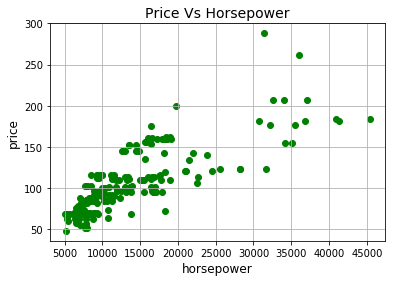

In [5]:
# Check Linearity
plt.scatter(df['price'], df['horsepower'], color='green')
plt.title('Price Vs Horsepower', fontsize=14)
plt.xlabel('horsepower', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.grid(True)
plt.show()

We observe that a linear relationship also exists between the Price and the horsepower

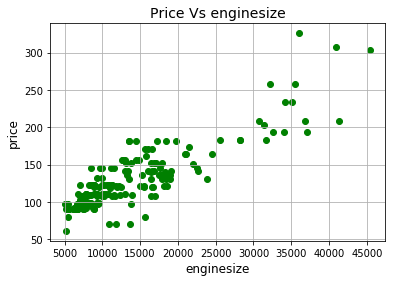

In [6]:
# Check Linearity
plt.scatter(df['price'], df['enginesize'], color='green')
plt.title('Price Vs enginesize', fontsize=14)
plt.xlabel('enginesize', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.grid(True)
plt.show()

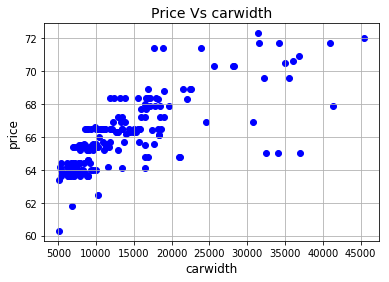

In [7]:
# Check Linearity
plt.scatter(df['price'], df['carwidth'], color='blue')
plt.title('Price Vs carwidth', fontsize=14)
plt.xlabel('carwidth', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
# here we have 4 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.
# Alternatively, you may add additional variables within the brackets
X = df[['curbweight','horsepower','enginesize', 'carwidth']] 
Y = df['price']


In [9]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -46230.644113467235
Coefficients: 
 [  2.17021793  49.59193228  84.6045574  577.48722906]


In [10]:
# prediction with sklearn
New_Curbweight = 2324
New_Horsepower = 97
New_Enginesize = 120
New_Carwidth = 65.2
print ('Predicted Price: \n', regr.predict([[New_Curbweight ,New_Horsepower, New_Enginesize, New_Carwidth]]))


Predicted Price: 
 [11428.0740108]


In [11]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.4
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           3.15e-73
Time:                        19:28:26   Log-Likelihood:                -1956.8
No. Observations:                 205   AIC:                             3924.
Df Residuals:                     200   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.623e+04   1.28e+04     -3.610      0.0

Thus, equation is :
Car_Price = -46230 + 2.1702*curbweight +49.5919*horsepower +84.6046*enginesize + 577.4872*carwidth

In [17]:
#predict with statsmodels
# prediction with sklearn
New_Curbweight = 2324
New_Horsepower = 97
New_Enginesize = 120
New_Carwidth = 65.2
print ('Predicted Price: \n', -46230 + 2.1702*New_Curbweight +49.5919*New_Horsepower +84.6046*New_Enginesize + 577.4872*New_Carwidth)


Predicted Price: 
 11428.676540000011


Since p-value of curbweight is more than 0.05, omit and rerun steps


In [13]:
X = df[['horsepower','enginesize', 'carwidth']] 
Y = df['price']

In [14]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -60205.60883156392
Coefficients: 
 [ 52.80259405  94.94188698 848.69838714]


In [15]:
# prediction with sklearn
New_Horsepower = 97
New_Enginesize = 120
New_Carwidth = 65.2
print ('Predicted Price: \n', regr.predict([[New_Horsepower, New_Enginesize, New_Carwidth]]))

Predicted Price: 
 [11644.40406999]


In [16]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.9
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           8.26e-74
Time:                        19:38:34   Log-Likelihood:                -1958.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     201   BIC:                             3938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.021e+04   1.02e+04     -5.889      0.0

In [20]:
# prediction with sklearn
New_Horsepower = 97
New_Enginesize = 120
New_Carwidth = 65.2
print ('Predicted Price: \n', -60210 + 52.8026*New_Horsepower + 94.9419*New_Enginesize + 848.6984*New_Carwidth)


Predicted Price: 
 11640.015879999999


In [23]:
# prediction with sklearn and statsmodels
New_Horsepower = 162
New_Enginesize = 130
New_Carwidth = 67.2
print ('Predicted Price with sklearn: ', regr.predict([[New_Horsepower, New_Enginesize, New_Carwidth]]))
print ('\n Predicted Price with statsmodels: ', -60210 + 52.8026*New_Horsepower + 94.9419*New_Enginesize + 848.6984*New_Carwidth)

 

Predicted Price with sklearn:  [17723.38832716]

 Predicted Price with statsmodels:  17719.000680000005


Notes:
- R² metric, it measures the proportion of variability in the target that can be explained using a feature X. 

In simple linear regression, we assess the relevancy of a feature by finding its p-value.
In the case of multiple linear regression, we use another metric: the F-statistic.


Ref: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8
